First we need to read in the data
Then Split up the columns by which utilites they have
    - Hot water and air conditioning
    - XOR version
    - None version
After creating a seperate column create a pie graph
    - The issues I had with the pie graph was since it was string it didn't work
        - Fixed the issue by finding the counts returned
    - The values returned at percentages of how much the graph holds.
        - Therefore to return it back to a whole value I would need to return it back.
    
    * Problem - Not outputting the means
    


In [ ]:
# The Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing_data = pd.read_csv("Data/Housing.csv")
housing_np = housing_data.to_numpy()

In [ ]:
housing_data.columns


In [ ]:
housing_data.isna().sum()

In [ ]:
housing_np[:,7]

In [78]:
basement = housing_np[:,7]
hotwaterheating = housing_np[:,8]
airconditioning = housing_np[:,9]
conditions = [
    (housing_np[:,8]  == 'yes') & (housing_np[:,9] == 'yes'),
    (housing_np[:,8]  == 'yes') ^ (housing_np[:,9] == 'yes'),
    (housing_np[:,8]  != 'yes') & (housing_np[:,9] != 'yes')
]

names = ["Hot Water AND AC","Hot Water OR Ac","nothing"]
new_col = np.select(conditions,names, default = "None")
housing_np = np.column_stack((housing_np,new_col))

conditions = (housing_np[:,8]  == 'yes') & (housing_np[:,9] == 'yes')
fancy = housing_np[np.where(conditions)]
print(fancy)
# conditions = (housing_np[:,8]  == 'yes') ^ (housing_np[:,9] == 'yes')
# nice = housing_np[np.where(conditions)]
# conditions = (housing_np[:,8]  != 'yes') & (housing_np[:,9] != 'yes')
# worse = housing_np[np.where(conditions)]


[[3640000 2275 3 1 3 'yes' 'no' 'no' 'yes' 'yes' 0 'yes' 'semi-furnished'
  'Hot Water AND AC' 'Hot Water AND AC']]


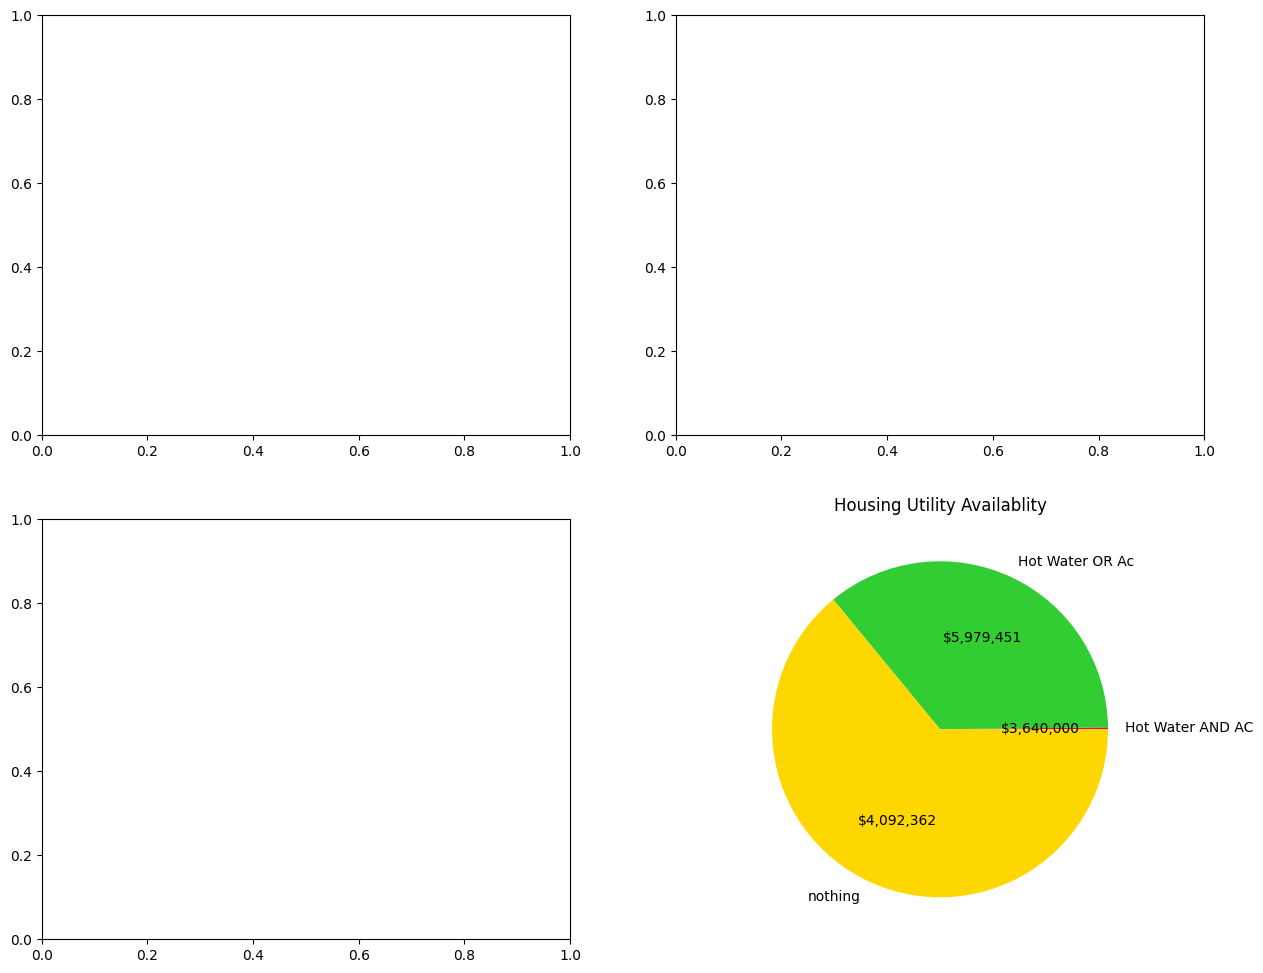

In [87]:
# housing_type = []
# housing_type.append(fancy.shape[0])
# housing_type.append(nice.shape[0])
# housing_type.append(worse.shape[0])

# def autopct_(lists):
#     for x in lists:
#         return f'%.2f\n{x}'




mean_price = {cat: float(housing_np[np.where(housing_np[:,13] == cat),0].mean()) for cat in names}
price_dict = {count: np.unique_counts(housing_np[:,13]).values.tolist()[ind] for ind,count in enumerate(np.unique_counts(housing_np[:,13]).counts)}

# def make_autopct(values):
#     def my_autopct(pct):
#         money = mean_price[price_dict[values]]
#         return f"${money}"
#     return my_autopct

values = np.unique_counts(housing_np[:,13]).counts


fig, axes = plt.subplots(2,2,figsize = (15,12))
axes[1,1].pie(values,labels=names,colors = ['crimson','limegreen','gold'],
              autopct = lambda p:"${:,}".format(int(round(mean_price[price_dict[round(float(p) * 545/100)]]))))

axes[1,1].set_title("Housing Utility Availablity")
plt.show()



In [ ]:

# mean_price
# values
# # fig, axes = plt.subplots(2,2,figsize = (15,12))
# # axes[1,1].pie(values,labels=names,colors = ['crimson','limegreen','gold'],autopct = lambda p:"${}".format(p))
# # plt.show()

array([  1, 195, 349])